<h1 style="border: 2px solid #FF5733; border-radius: 10px; background-color: #F0F0F0; padding: 20px; text-align: center;">
  🎬 Exploring Netflix Data: Insights into Movies, Shows, and Viewer Trends
</h1>


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
# Loading the dataset
netflix_data = pd.read_csv('netflix_titles.csv')

In [88]:
# Displaying the first few rows of the dataset to understand its structure
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### **Project Introduction:**
- This project analyzes a Netflix dataset  detailing movies and TV shows.
- It aims to uncover trends in content types, ratings, and release years.

### **Project Objectives:**
- Analyze the distribution of Netflix content by type, rating, and release year.
- Explore missing data and its impact on the dataset for more accurate insights.
 
### Data Exploration:
- `show_id`: A unique identifier for each show.
- `type`: Whether the content is a "Movie" or "TV Show."
- `title`: The title of the content.
- `director`: The director of the content (contains missing values).
- `cast`: The main cast of the content (contains missing values).
- `country`: The country of origin (contains missing values).
- `date_added`: The date the content was added to Netflix (contains missing values).
- `release_year`: The year the content was released.
- `rating`: The content rating (contains missing values).
- `duration`: The duration of the content (either in minutes for movies or seasons for TV shows).
- `listed_in`: The genres or categories the content is listed under.
- `description`: A brief descriptioe, or let me know if you'd like to focus on something else!

## Data Overview: Structure and Summary


In [89]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [90]:
netflix_data.shape   # Provides details like column names, non-null count, and datatype

(8807, 12)

## Identifying Missing Values


In [91]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Missing Values Heatmap 


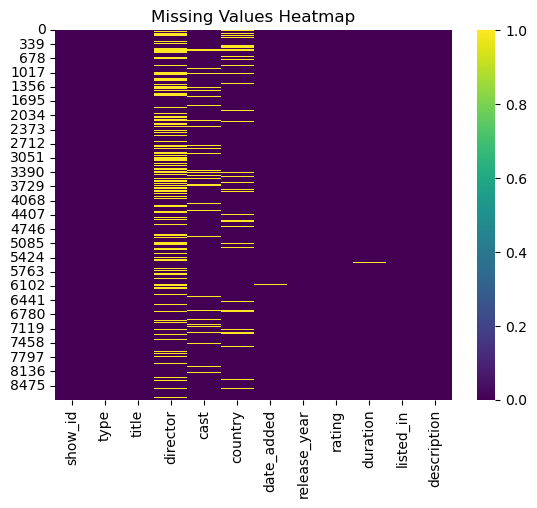

In [92]:
sns.heatmap(netflix_data.isnull(), cmap = 'viridis', annot = False)
plt.title("Missing Values Heatmap")
plt.show()


<h2 style="text-align:center; color: #8A2BE2; font-size: 30px; font-family: 'Arial', sans-serif; font-weight: bold; 
           border: 2px solid #8A2BE2; padding: 10px; border-radius: 10px; background-color: #E6E6FA;">
    Cleaning & Preparing Data: Missing Values & Outliers 🧹
</h2>


### Next Steps:
1. **Data Cleaning:**
   - Handle missing values.
   - Remove duplicate entries.
   - Correct any inconsistencies in the data.

**Approach for Missing Values:**
- For `director`, `cast`, and `country`, I will replace missing values with `"Unknown"` since these are categorical fields.
- For `date_added`, `rating`, and `duration`, I will drop rows with missing values as they represent a small percentage of the total data.

I'll now clean the dataset based on the above plan.

In [117]:
# Handling missing values by replacing with "Unknown" for categorical fields
netflix_data['director'].fillna("Unknown" , inplace =True)
netflix_data['cast'].fillna("Unknown", inplace = True)
netflix_data['country'].fillna("Unknown", inplace = True)

In [94]:
# Dropping rows with missing values in 'date_added', 'rating', and 'duration' columns
netflix_data.dropna(subset = ['date_added', 'rating', 'duration'], inplace = True)

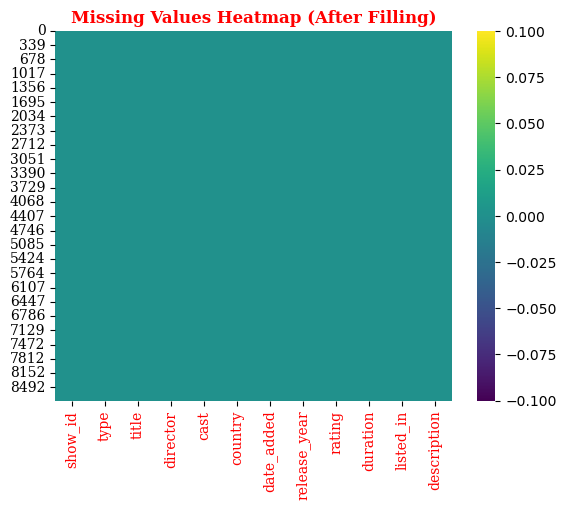

In [95]:
sns.heatmap(netflix_data.isnull(), cmap = 'viridis')
plt.title("Missing Values Heatmap (After Filling)", color = 'red' ,family = 'serif', fontweight='bold')
plt.xticks(color = 'red' ,family = 'serif')
plt.yticks(family = 'serif')
plt.show()


## Exploring the Dataset: Key Statistical Insights 📈

In [96]:
netflix_data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## 🔍 2. Distribution of Movies vs TV Shows

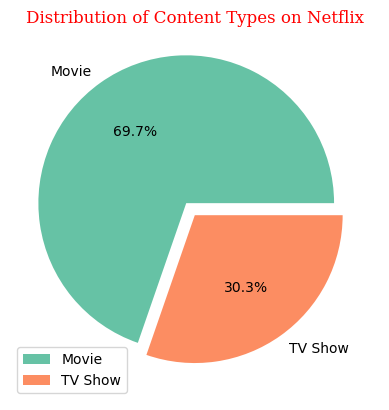

In [97]:
type_counts = netflix_data['type'].value_counts()

# sns.set_theme(style="whitegrid")

explode = (0.1 , 0)
plt.pie(type_counts , labels =type_counts.index, autopct = "%1.1f%%", explode = explode,colors=sns.color_palette("Set2"))
plt.title('Distribution of Content Types on Netflix', color= 'red' ,family = 'serif')
plt.legend()
plt.show()

In [98]:
netflix_data.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


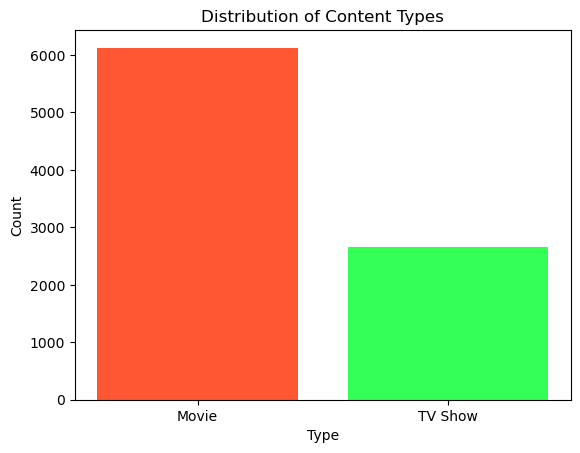

In [99]:
type_counts = netflix_data['type'].value_counts()
plt.bar(type_counts.index, type_counts.values, color=['#FF5733', '#33FF57'])
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


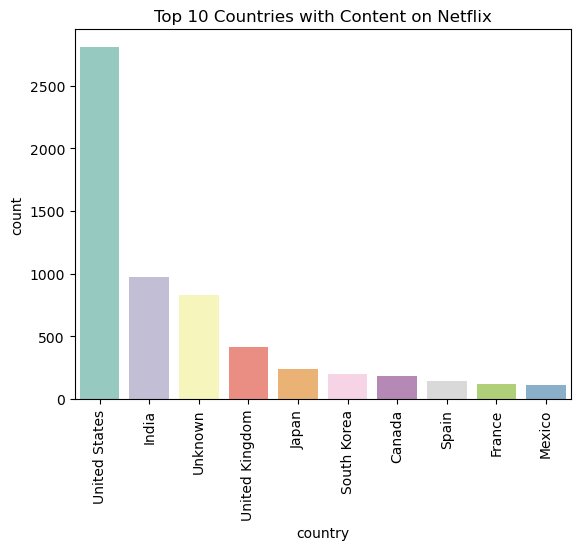

In [100]:
top_countreis = netflix_data['country'].value_counts().nlargest(10).index

sns.countplot(x= 'country', data = netflix_data[netflix_data['country'].isin(top_countreis)], order = top_countreis, hue= 'country' ,palette = 'Set3')
plt.title('Top 10 Countries with Content on Netflix')
plt.xlabel('country')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

## 🌍 3. Top 10 Countries with Most Netflix Content

Text(0, 0.5, 'count')

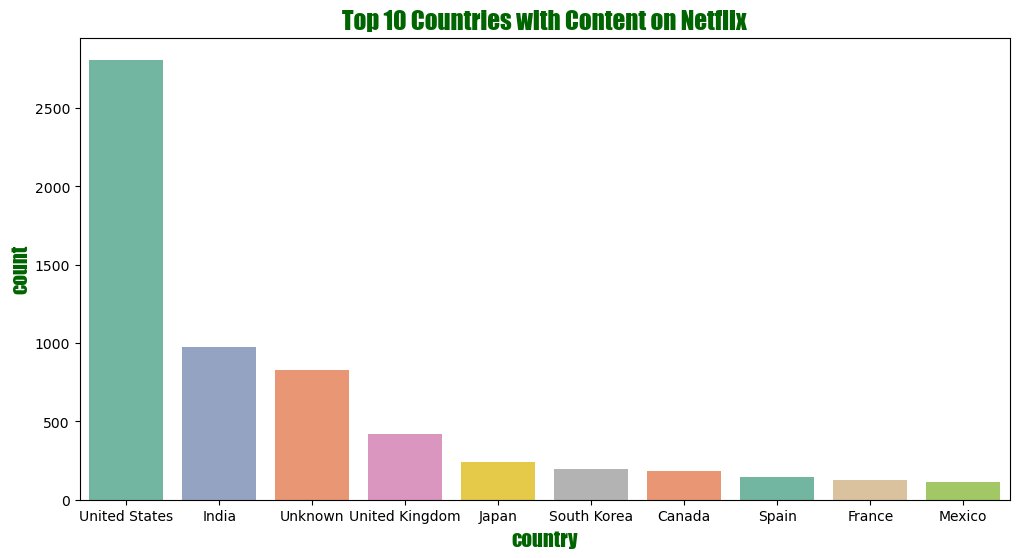

In [101]:
remove_uknown = netflix_data[netflix_data['country'] != 'Unknown']
top_countries = netflix_data['country'].value_counts().nlargest(10).index
plt.figure(figsize= (12, 6))

sns.countplot(x ='country', data=netflix_data[netflix_data['country'].isin(top_countries)], order = top_countries, hue='country', palette = 'Set2')
plt.title('Top 10 Countries with Content on Netflix', color = 'darkgreen', family= 'fantasy', size= 18)
plt.xlabel('country', color='darkgreen', size = 15,  family='fantasy')
plt.ylabel('count', color = 'darkgreen', size = 15,  family='fantasy')

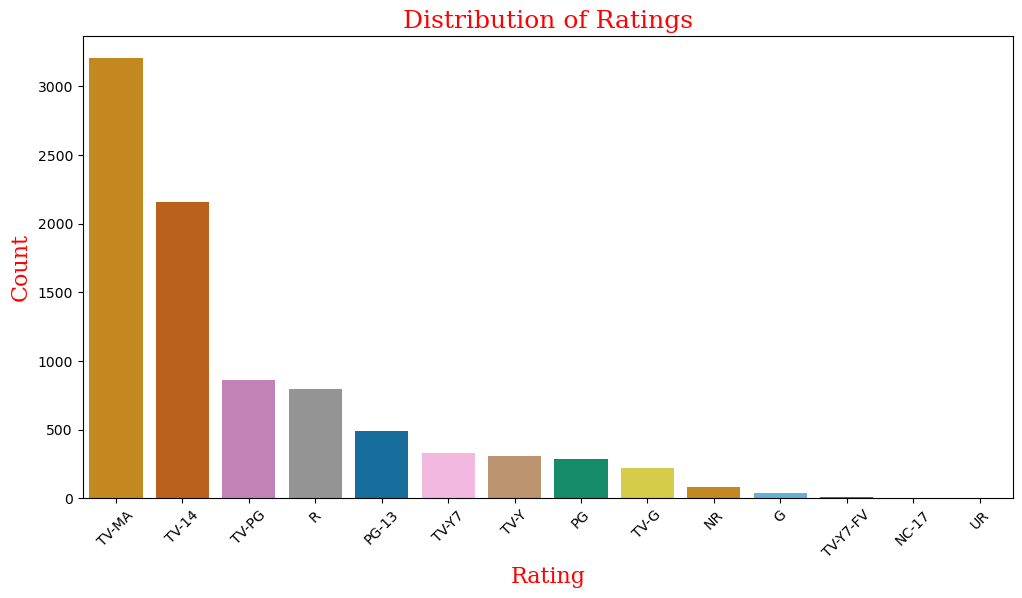

In [102]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'rating', data = netflix_data, order = netflix_data['rating'].value_counts().index, hue = 'rating', palette = 'colorblind')
plt.title('Distribution of Ratings', color= 'red' ,size=18, family = 'serif')
plt.xlabel('Rating', fontsize=16, color= 'red', family = 'serif')
plt.ylabel('Count', fontsize=16, color= 'red', family = 'serif')
plt.xticks(rotation=45)
plt.show()

### Steps for Data Visualization and Time Series Analysis:

#### 1. **Distribution of Content Over Different Genres:**
   - Split the `listed_in` column, as it contains multiple genres/categories for each show.
   - Create a bar plot to show the distribution of content across genres.

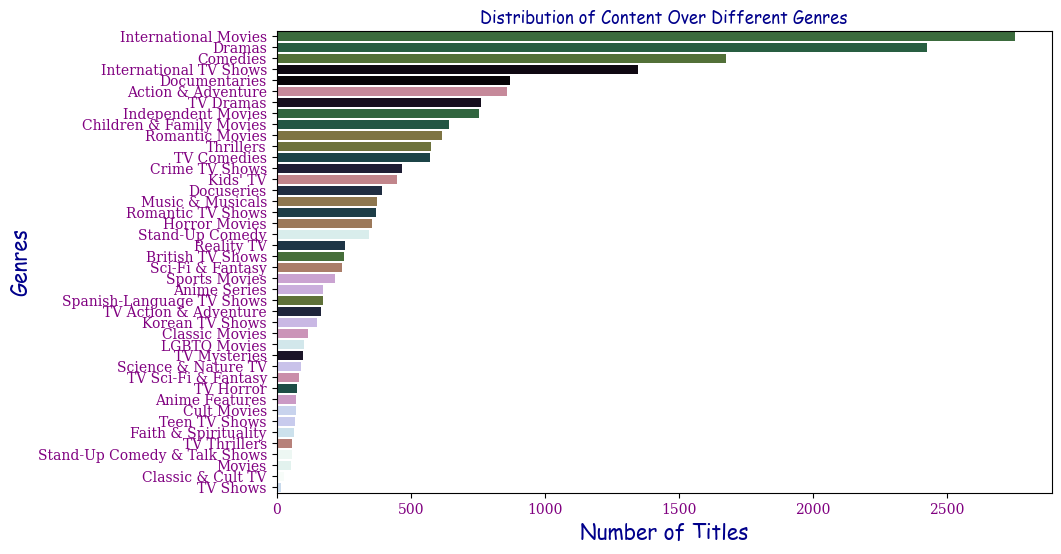

In [103]:
netflix_data['geners'] = netflix_data['listed_in'].str.split(', ')
geners_data = netflix_data.explode('geners')

plt.figure(figsize = (10 , 6))
sns.countplot(y = 'geners' , data = geners_data, order = geners_data['geners'].value_counts().index, hue='geners', palette ='cubehelix')
plt.title('Distribution of Content Over Different Genres', color = 'Darkblue' , family = 'cursive')
plt.xlabel('Number of Titles', color = 'Darkblue' , family = 'cursive', size= 15)
plt.ylabel('Genres',  color = 'Darkblue' , family = 'cursive', size=15)
plt.yticks(color = 'purple', family ='serif')
plt.xticks(color = 'purple', family ='serif')
plt.show()

#### 2. **Distribution of Content Across Release Years:**
   - Use a histogram or bar plot to visualize the distribution of content across release years.

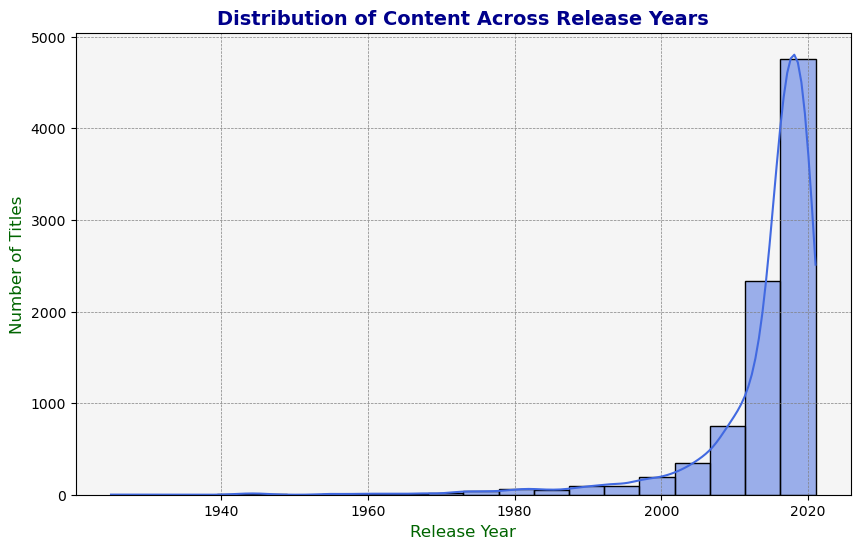

In [104]:
plt.figure(figsize = (10, 6))
sns.histplot(netflix_data['release_year'], bins = 20, kde = True, color = "royalblue")
plt.title('Distribution of Content Across Release Years', fontsize=14, color='darkblue', fontweight='bold')
plt.xlabel('Release Year', fontsize=12, color='darkgreen')
plt.ylabel('Number of Titles', fontsize=12, color='darkgreen')
plt.grid(color='gray', linestyle='dashed', linewidth=0.5)
plt.gca().set_facecolor('#f5f5f5')  # Light gray background
plt.show()

In [105]:
# Step 1: Split 'duration' into numeric values and units (minutes or seasons)
netflix_data['duration_value'] = netflix_data['duration'].str.extract(r'(\d+)').astype(int)
netflix_data['duration_unit'] = netflix_data['duration'].str.extract(r'([a-zA-Z]+)')

In [106]:
netflix_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,geners,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries],90,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]",2,Seasons


In [107]:
netflix_data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,geners,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries],90,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]",2,Seasons


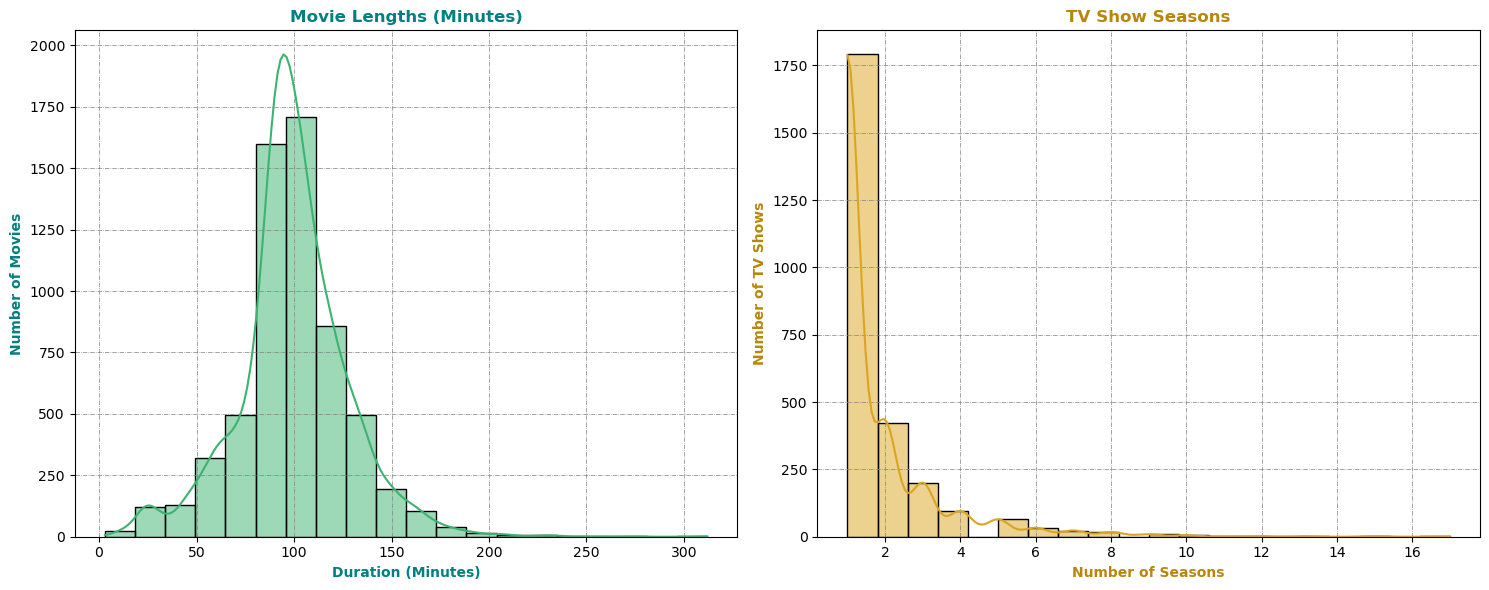

In [108]:
# Step 2: Create subplots (1 row, 2 columns)
plt.figure(figsize=(15, 6))

# Step 3: Plot Distribution of Movie Lengths (Minutes)
plt.subplot(1, 2, 1)
sns.histplot(netflix_data[netflix_data['type']=='Movie']['duration_value'], bins=20, kde=True, color='mediumseagreen')
plt.title('Movie Lengths (Minutes)', color='teal', fontweight = 'bold')
plt.xlabel('Duration (Minutes)', color='teal',fontweight = 'bold')
plt.ylabel('Number of Movies', color='teal',fontweight = 'bold')
plt.grid(color='gray', linestyle='-.', linewidth=0.5)


# Step 4: Plot Distribution of TV Show Seasons
plt.subplot(1, 2, 2)
sns.histplot(netflix_data[netflix_data['type'] == 'TV Show']['duration_value'], bins=20, kde=True, color='goldenrod')
plt.title('TV Show Seasons', color='darkgoldenrod',fontweight = 'bold')
plt.xlabel('Number of Seasons', color='darkgoldenrod',fontweight = 'bold')
plt.ylabel('Number of TV Shows', color='darkgoldenrod',fontweight = 'bold')
plt.grid(color='gray', linestyle='-.', linewidth=0.5)


# Step 5: Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [109]:
top_rated = netflix_data.sort_values(by = 'release_year', ascending=False).head(10)
top_rated[['title', 'release_year', 'rating', 'listed_in']]

,title,release_year,rating,listed_in
693,Ali & Ratu Ratu Queens,2021,TV-14,"Comedies, Dramas, International Movies"
781,Black Holes | The Edge of All We Know,2021,TV-14,Documentaries
762,Sweet & Sour,2021,TV-14,"Comedies, International Movies, Romantic Movies"
763,Sweet Tooth,2021,TV-14,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ..."
764,Trippin' with the Kandasamys,2021,TV-14,"Comedies, International Movies, Romantic Movies"
765,Xtreme,2021,TV-MA,"Action & Adventure, International Movies"
766,Alan Saldaña: Locked Up,2021,TV-MA,Stand-Up Comedy
767,Creator's File: GOLD,2021,TV-14,"International TV Shows, TV Comedies"
768,Dancing Queens,2021,TV-MA,"Comedies, Dramas, International Movies"
770,Myriam Fares: The Journey,2021,TV-14,"Documentaries, International Movies, Music & M..."


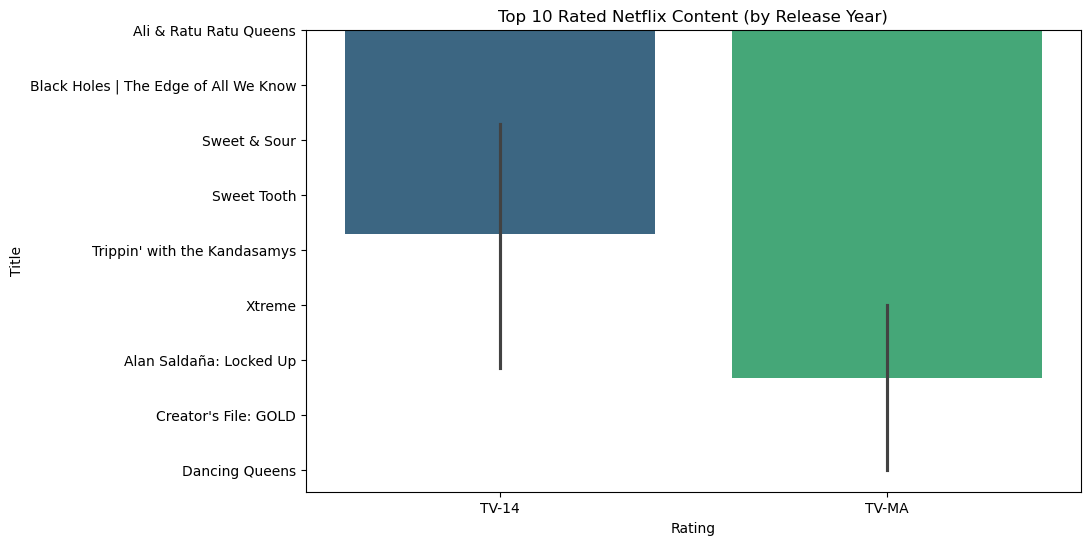

In [110]:


# Sorting the data and selecting the top 10
top_rated = netflix_data.sort_values(by='release_year', ascending=False).head(10)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='title', data=top_rated, hue='rating', palette='viridis')

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Title')
plt.title('Top 10 Rated Netflix Content (by Release Year)')

plt.show()


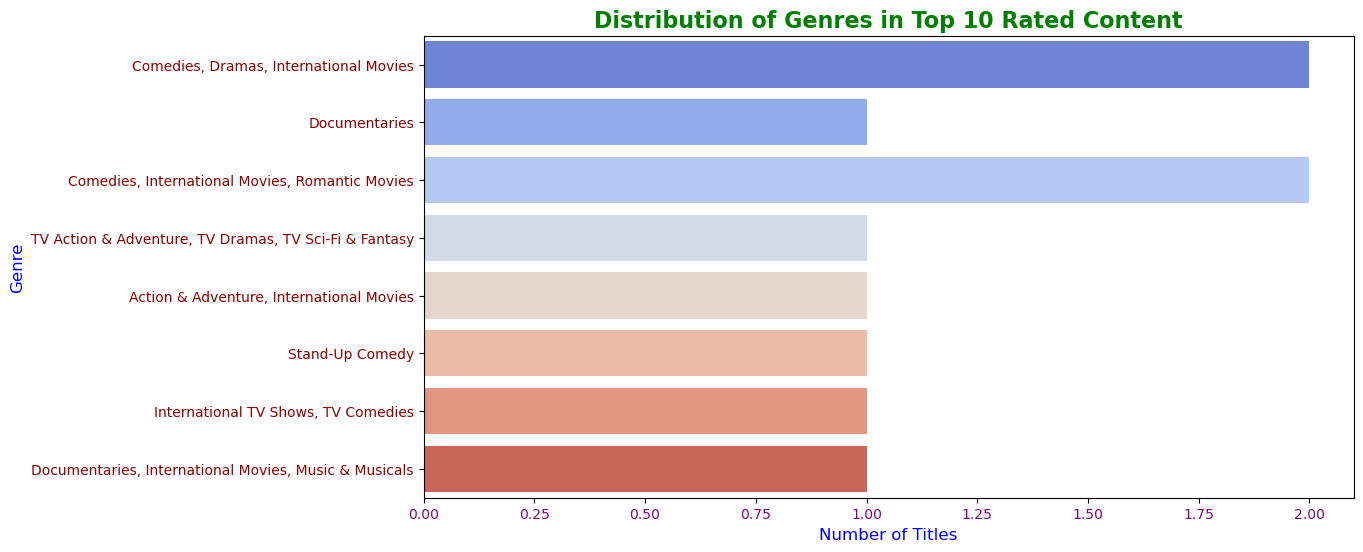

In [111]:
plt.figure(figsize=(12, 6))

# Creating the countplot with hue and coloring the bars by 'listed_in'
sns.countplot(y='listed_in', data=top_rated, hue='listed_in', palette='coolwarm')

plt.title('Distribution of Genres in Top 10 Rated Content', color='green', fontsize=16, fontweight='bold')
plt.xlabel('Number of Titles', color='blue', fontsize=12)
plt.ylabel('Genre', color='blue', fontsize=12)

# Customizing x and y ticks
plt.xticks(color='purple', fontsize=10)
plt.yticks(color='darkred', fontsize=10)
plt.show()


In [112]:
# Convert release_year to integer for plotting
netflix_data['release_year'] = netflix_data['release_year'].astype(int)

# Reset index after data cleaning
netflix_data.reset_index(drop=True, inplace=True)


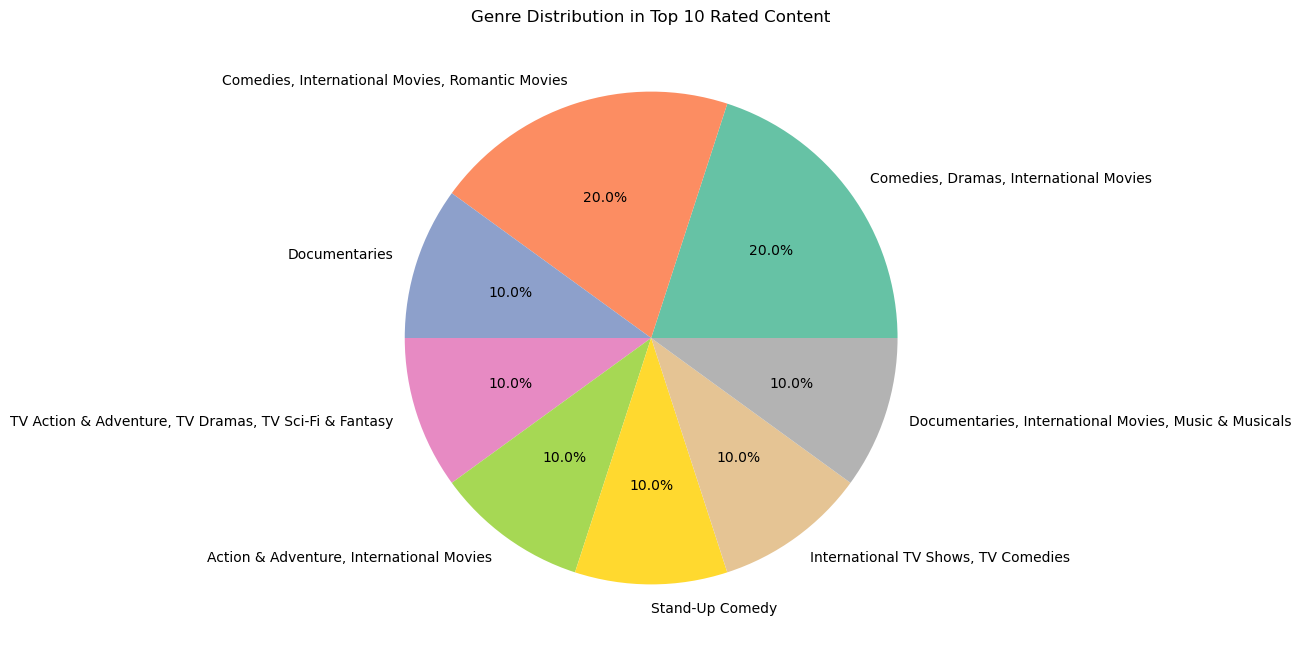

In [113]:
genre_counts = top_rated['listed_in'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Genre Distribution in Top 10 Rated Content')
plt.show()


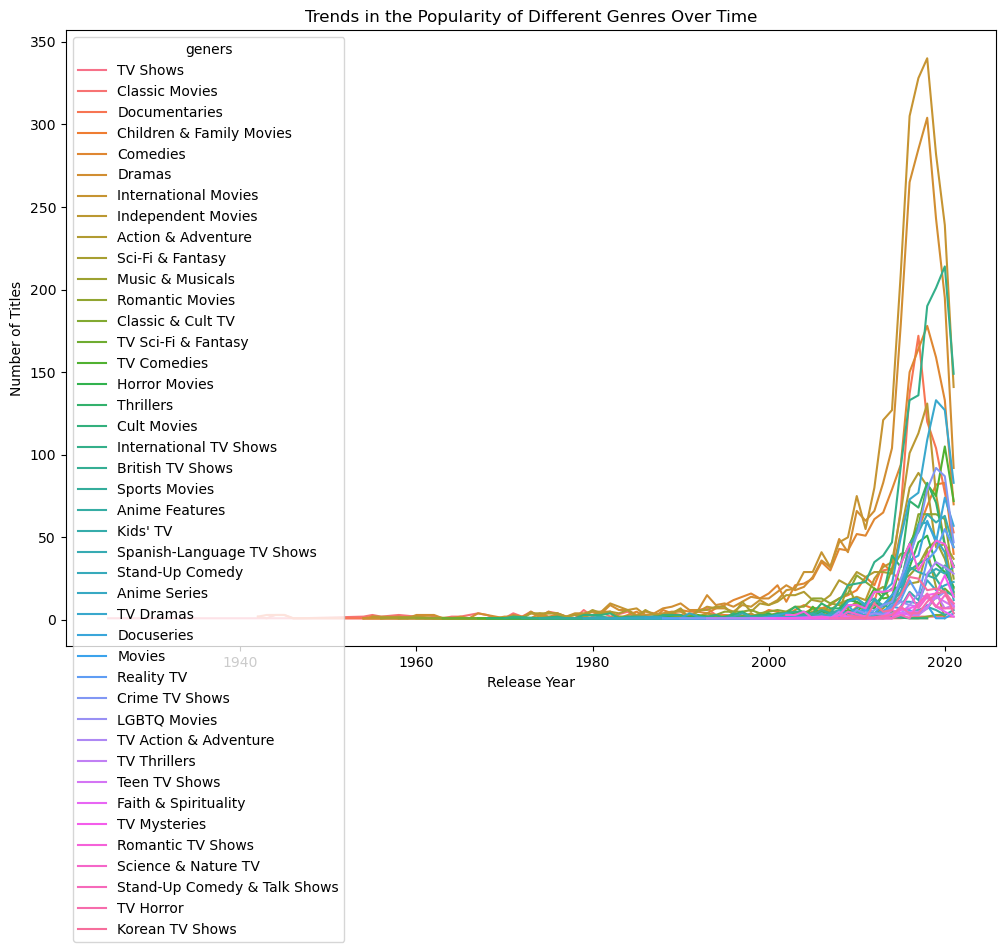

In [114]:
# Grouping by release year and genres
genre_trends = geners_data.groupby(['release_year', 'geners']).size().reset_index(name='count')

# Plotting genre trends over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=genre_trends, x='release_year', y='count', hue='geners')
plt.title('Trends in the Popularity of Different Genres Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

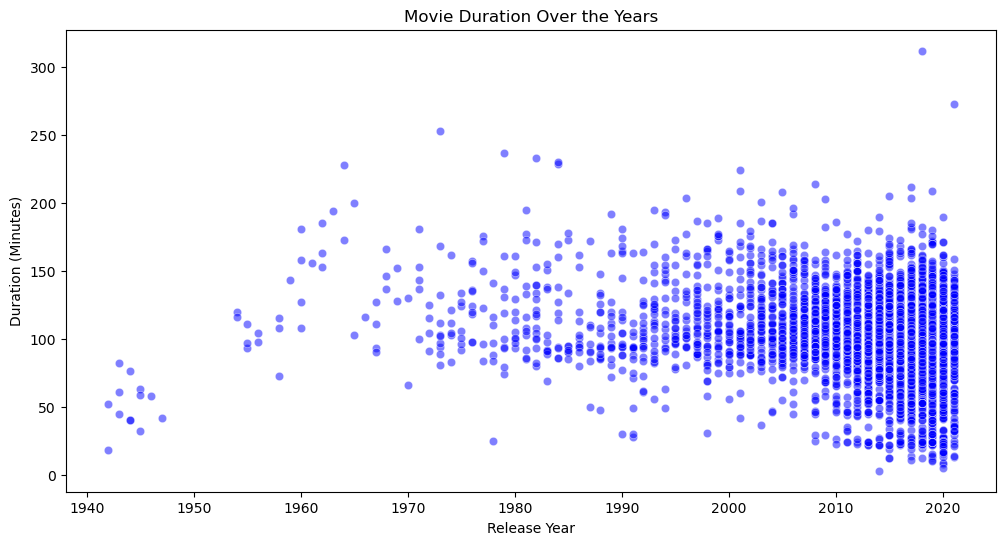

In [115]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=netflix_data[netflix_data['type'] == 'Movie'], x='release_year', y='duration_value', alpha=0.5, color='blue')
plt.title("Movie Duration Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Duration (Minutes)")
plt.show()


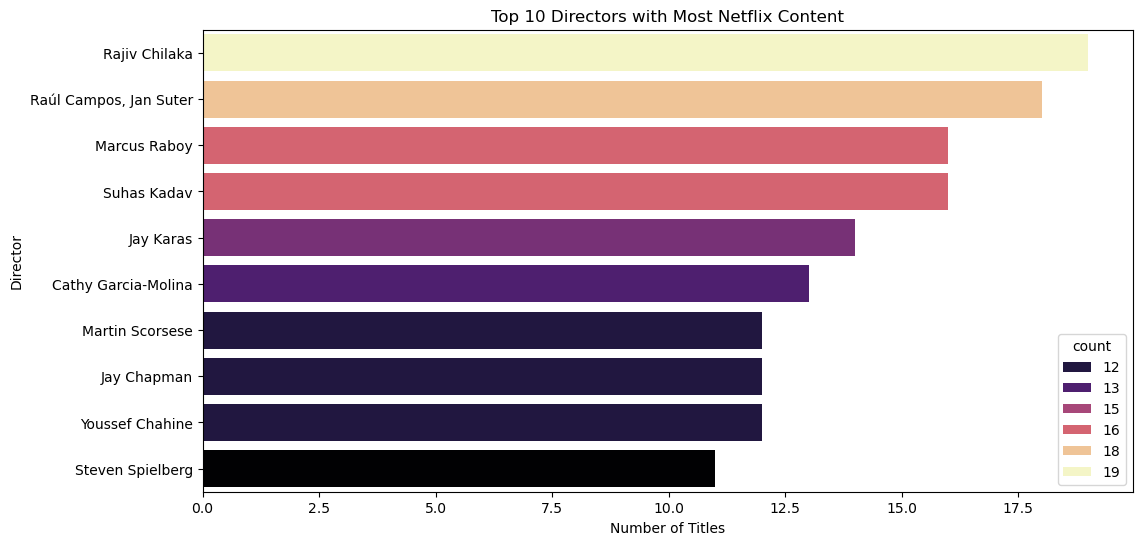

In [130]:
# Filter out 'Unknown' directors
remove_unknowns = netflix_data[netflix_data['director'] != 'Unknown']

# Get top 10 directors with most content
top_directors = remove_unknowns['director'].value_counts().nlargest(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, hue=top_directors ,palette='magma')
plt.title("Top 10 Directors with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


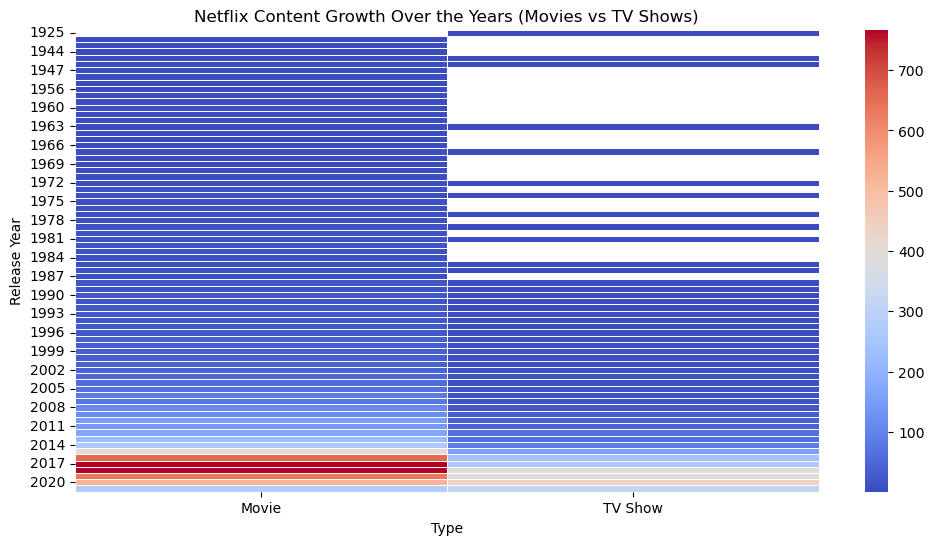

In [131]:
plt.figure(figsize=(12, 6))
content_per_year = netflix_data.groupby(['release_year', 'type']).size().unstack()

sns.heatmap(content_per_year, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Netflix Content Growth Over the Years (Movies vs TV Shows)")
plt.xlabel("Type")
plt.ylabel("Release Year")
plt.show()


<Figure size 1400x700 with 0 Axes>

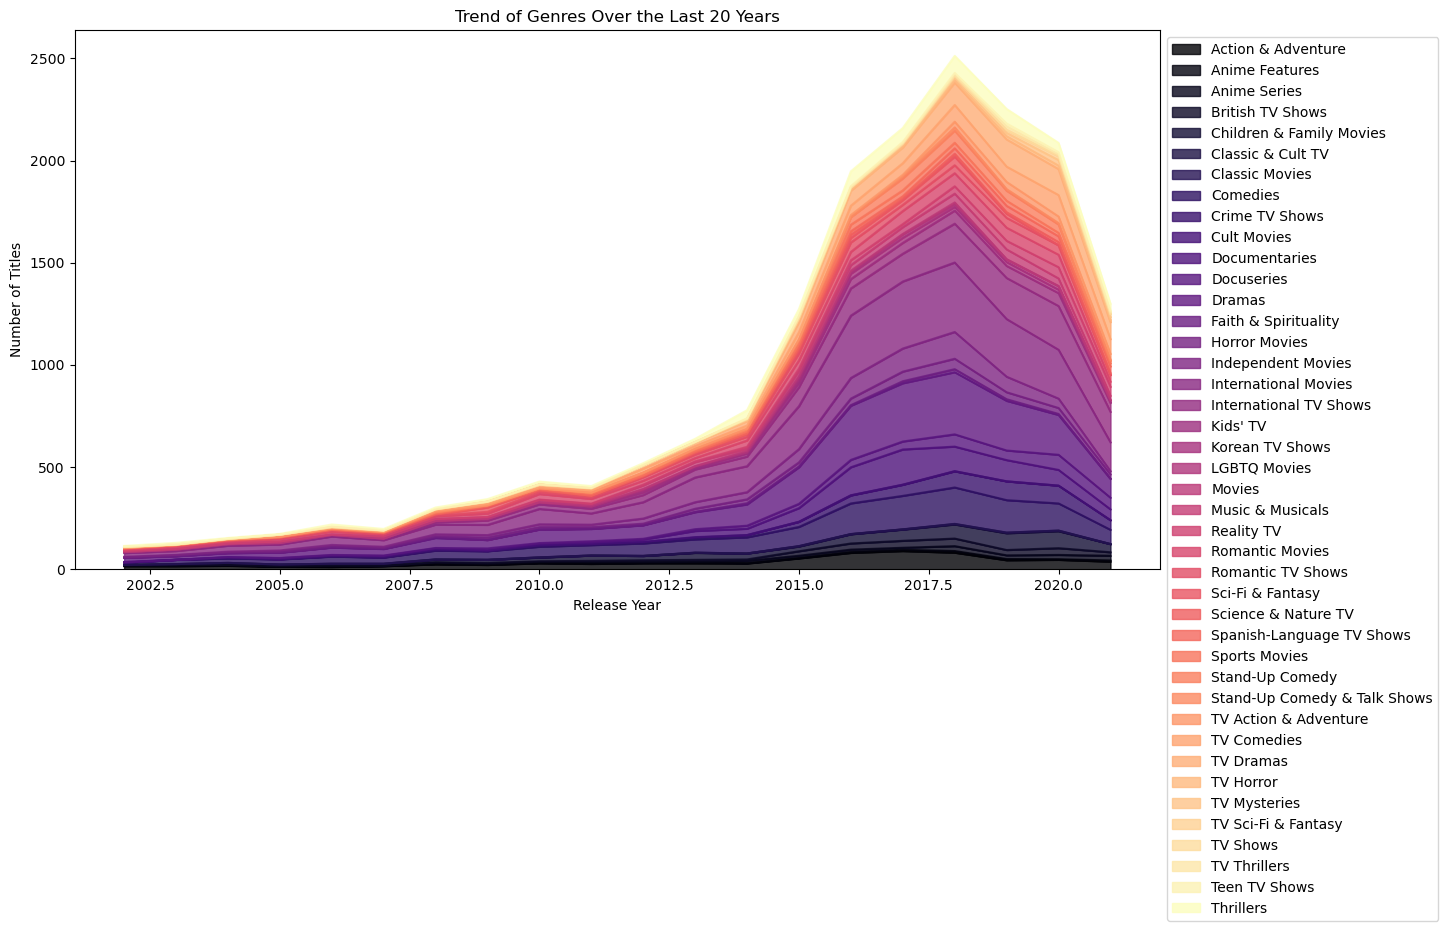

In [132]:
# Extracting year and genres
genre_trends = genres_data.groupby(['release_year', 'genres']).size().unstack().fillna(0)

# Plotting stacked area chart
plt.figure(figsize=(14, 7))
genre_trends.iloc[-20:].plot(kind='area', stacked=True, colormap='magma', alpha=0.8, figsize=(14, 7))
plt.title("Trend of Genres Over the Last 20 Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()


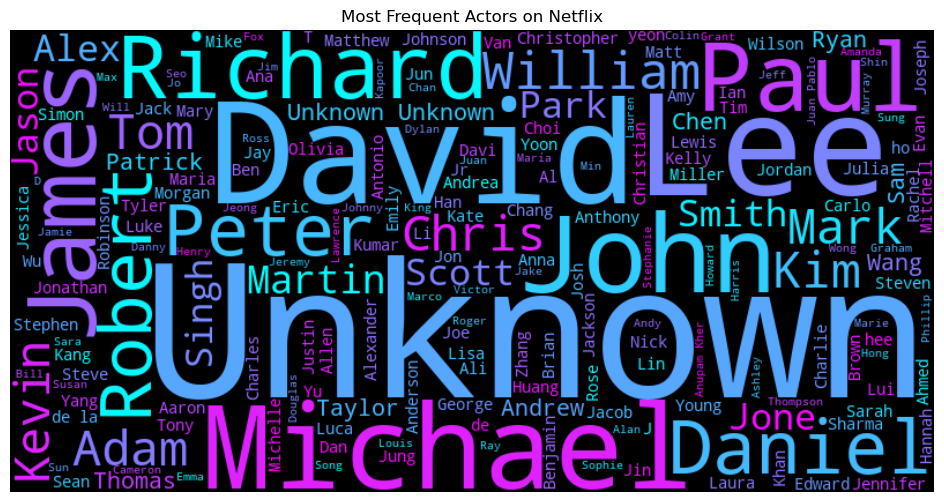

In [133]:
from wordcloud import WordCloud

text = " ".join(netflix_data['cast'].dropna())  # Combining all actors' names
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="cool").generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Actors on Netflix")
plt.show()


conclusion = """
### 🔥 Key Insights from Netflix Data Analysis
1. The highest number of Netflix titles were released in recent years, showing increasing content production.
2. The USA leads in content production, followed by India and the UK.
3. Drama and Comedy are the most popular genres on Netflix.
4. Most Netflix content is rated TV-MA, indicating a focus on mature audiences.
5. Movie durations are mostly between 80-120 minutes, while TV shows generally have 1-2 seasons.
6. The most common words in Netflix titles include 'Love', 'Life', and 'Story'.
7. Netflix adds more content in some months than others, possibly due to seasonal trends.
8. Some directors have significantly more content on Netflix, showing their strong partnership with the platform.

🔹 **Business Recommendations:**
- Netflix can focus more on emerging genres to diversify content.
- Understanding seasonal trends can help optimize content release schedules.
- Collaboration with popular directors can drive higher viewership.
"""